In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
from sklearn.impute import SimpleImputer


In [3]:
titanic_train_set = pd.read_csv("./datasets/titanic/train.csv")
titanic_test_set = pd.read_csv("./datasets/titanic/test.csv")
titanic_gender_set = pd.read_csv("./datasets/titanic/gender_submission.csv")

In [4]:
titanic_gender_set

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [5]:
titanic_test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
titanic_train_set

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


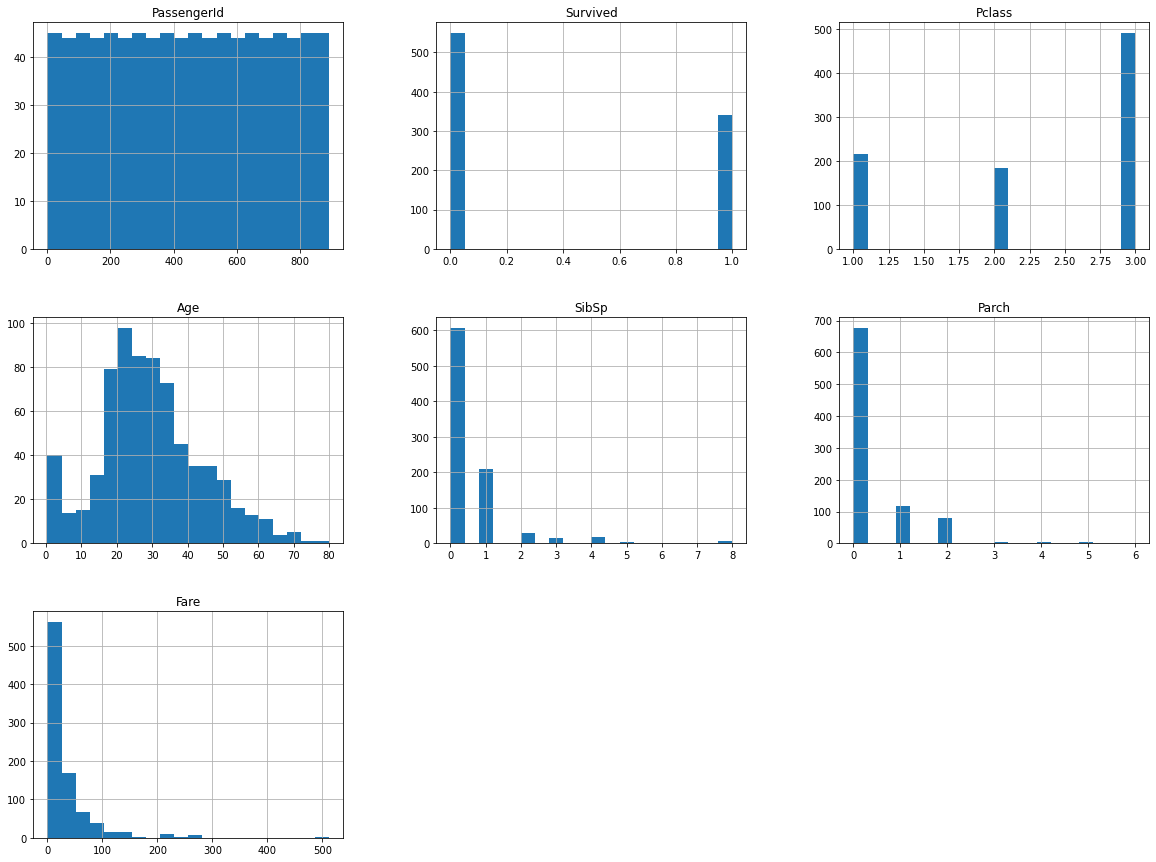

In [7]:
titanic_train_set.hist(bins=20, figsize=(20,15))
plt.show()

In [8]:
titanic_train_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [9]:
titanic_train_set["Cabin"].value_counts()

B96 B98        4
G6             4
C23 C25 C27    4
C22 C26        3
F33            3
              ..
E34            1
C7             1
C54            1
E36            1
C148           1
Name: Cabin, Length: 147, dtype: int64

In [10]:
titanic = titanic_train_set.copy()

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

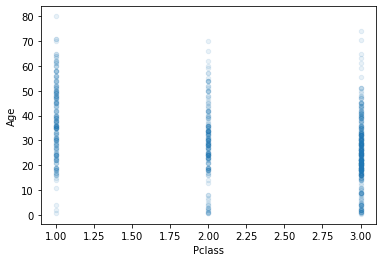

In [11]:
titanic.plot(kind="scatter", x="Pclass",y="Age", alpha=0.1 )

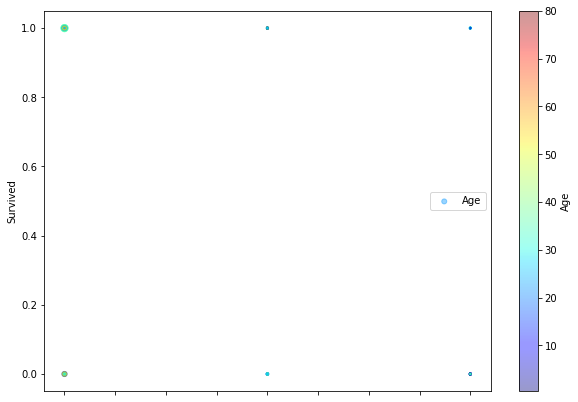

In [12]:
titanic.plot(kind="scatter", x="Pclass", y="Survived", alpha=0.4,
s=titanic["Fare"]/10, label="Age", figsize=(10,7),
c="Age", cmap=plt.get_cmap("jet"), colorbar=True,
)
plt.legend()

In [13]:
corr_matrix = titanic.corr()
corr_matrix

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


In [14]:
corr_matrix["Survived"].sort_values(ascending=False)

Survived       1.000000
Fare           0.257307
Parch          0.081629
PassengerId   -0.005007
SibSp         -0.035322
Age           -0.077221
Pclass        -0.338481
Name: Survived, dtype: float64

array([[<AxesSubplot:xlabel='Survived', ylabel='Survived'>,
        <AxesSubplot:xlabel='Fare', ylabel='Survived'>,
        <AxesSubplot:xlabel='Parch', ylabel='Survived'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Survived'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Fare'>,
        <AxesSubplot:xlabel='Fare', ylabel='Fare'>,
        <AxesSubplot:xlabel='Parch', ylabel='Fare'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Fare'>],
       [<AxesSubplot:xlabel='Survived', ylabel='Parch'>,
        <AxesSubplot:xlabel='Fare', ylabel='Parch'>,
        <AxesSubplot:xlabel='Parch', ylabel='Parch'>,
        <AxesSubplot:xlabel='SibSp', ylabel='Parch'>],
       [<AxesSubplot:xlabel='Survived', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Fare', ylabel='SibSp'>,
        <AxesSubplot:xlabel='Parch', ylabel='SibSp'>,
        <AxesSubplot:xlabel='SibSp', ylabel='SibSp'>]], dtype=object)

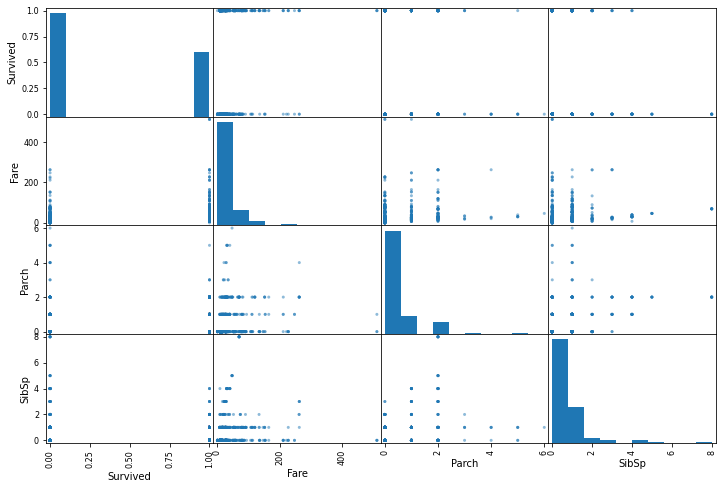

In [15]:
attributes = ["Survived", "Fare", "Parch","SibSp"]
scatter_matrix(titanic[attributes],figsize=(12,8))

<AxesSubplot:xlabel='Fare', ylabel='Survived'>

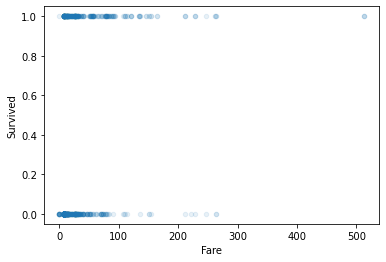

In [16]:
titanic.plot(kind="scatter", x="Fare", y="Survived", alpha=0.1)

In [63]:
titanic_test_set

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [38]:
titanic = titanic_train_set.drop("Survived", axis=1)
titanic_labels = titanic_train_set["Survived"].copy();

In [39]:

imputer = SimpleImputer(strategy="median")
titanic_num = titanic.drop(["Name","Sex","Ticket","Cabin","Embarked"], axis=1)



In [40]:
titanic_num

,PassengerId,Pclass,Age,SibSp,Parch,Fare
0,1,3,22.0,1,0,7.2500
1,2,1,38.0,1,0,71.2833
2,3,3,26.0,0,0,7.9250
3,4,1,35.0,1,0,53.1000
4,5,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,887,2,27.0,0,0,13.0000
887,888,1,19.0,0,0,30.0000
888,889,3,NaN,1,2,23.4500
889,890,1,26.0,0,0,30.0000


In [41]:
titanic_char = titanic[["Name","Sex","Ticket","Cabin","Embarked"]]
titanic_char

,Name,Sex,Ticket,Cabin,Embarked
0,"Braund, Mr. Owen Harris",male,A/5 21171,NaN,S
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,PC 17599,C85,C
2,"Heikkinen, Miss. Laina",female,STON/O2. 3101282,NaN,S
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,113803,C123,S
4,"Allen, Mr. William Henry",male,373450,NaN,S
...,...,...,...,...,...
886,"Montvila, Rev. Juozas",male,211536,NaN,S
887,"Graham, Miss. Margaret Edith",female,112053,B42,S
888,"Johnston, Miss. Catherine Helen ""Carrie""",female,W./C. 6607,NaN,S
889,"Behr, Mr. Karl Howell",male,111369,C148,C


In [144]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy="median")),
    ('std_scaler', MinMaxScaler()),])
titanic_tr = num_pipeline.fit_transform(titanic_num)
titanic_tr

array([[0.        , 1.        , 0.27117366, 0.125     , 0.        ,
        0.01415106],
       [0.0011236 , 0.        , 0.4722292 , 0.125     , 0.        ,
        0.13913574],
       [0.00224719, 1.        , 0.32143755, 0.        , 0.        ,
        0.01546857],
       ...,
       [0.99775281, 1.        , 0.34656949, 0.125     , 0.33333333,
        0.04577135],
       [0.9988764 , 0.        , 0.32143755, 0.        , 0.        ,
        0.0585561 ],
       [1.        , 1.        , 0.39683338, 0.        , 0.        ,
        0.01512699]])

In [145]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

char_attribs = list(titanic_char)
num_attribs = list(titanic_num)
full_pipeline = ColumnTransformer([
("num", num_pipeline, num_attribs),
("chars", OneHotEncoder(handle_unknown="ignore"), char_attribs),
])
titanic_prepared = full_pipeline.fit_transform(titanic)

In [146]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(titanic_prepared, titanic_labels)

LinearRegression()

In [147]:
some_data = titanic.iloc[:5]
some_labels = titanic_labels.iloc[:5]
some_data_prepared = full_pipeline.transform(some_data)
print("Predictions:", lin_reg.predict(some_data_prepared))
print("Labels:", list(some_labels))


Predictions: [ 6.53251599e-06  1.00000648e+00  9.99995621e-01  9.99997587e-01
 -3.37605315e-06]
Labels: [0, 1, 1, 1, 0]


In [148]:
from sklearn.metrics import mean_squared_error
titanic_predictions = lin_reg.predict(titanic_prepared)
lin_mse = mean_squared_error(titanic_labels, titanic_predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9.069156814559445e-06

In [149]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:", scores.std())

In [150]:
from sklearn.model_selection import cross_val_score
lin_scores = cross_val_score(lin_reg, titanic_prepared, titanic_labels, scoring="neg_mean_squared_error", cv=10)
lin_rmse_scores = np.sqrt(-lin_scores)

In [151]:
display_scores(lin_rmse_scores)

Scores: [0.34575504 0.37768705 0.38422157 0.38825321 0.36584605 0.34497854
 0.39006631 0.36034278 0.31771989 0.34856664]
Mean: 0.3623437092416939
Standard deviation: 0.022199098543586926


In [152]:

X_test = titanic_test_set.copy()
y_test = titanic_gender_set["Survived"].copy()
X_test_prepared = full_pipeline.transform(X_test)
final_predictions = lin_reg.predict(X_test_prepared)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)

In [153]:
from scipy import stats
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                        loc=squared_errors.mean(),
                        scale=stats.sem(squared_errors)))

array([0.26854252, 0.30010253])

In [154]:
np_pred = np.array(final_predictions)

In [155]:
ids = titanic_gender_set["PassengerId"].copy()
ids = np.array(ids)
ids

array([ 892,  893,  894,  895,  896,  897,  898,  899,  900,  901,  902,
        903,  904,  905,  906,  907,  908,  909,  910,  911,  912,  913,
        914,  915,  916,  917,  918,  919,  920,  921,  922,  923,  924,
        925,  926,  927,  928,  929,  930,  931,  932,  933,  934,  935,
        936,  937,  938,  939,  940,  941,  942,  943,  944,  945,  946,
        947,  948,  949,  950,  951,  952,  953,  954,  955,  956,  957,
        958,  959,  960,  961,  962,  963,  964,  965,  966,  967,  968,
        969,  970,  971,  972,  973,  974,  975,  976,  977,  978,  979,
        980,  981,  982,  983,  984,  985,  986,  987,  988,  989,  990,
        991,  992,  993,  994,  995,  996,  997,  998,  999, 1000, 1001,
       1002, 1003, 1004, 1005, 1006, 1007, 1008, 1009, 1010, 1011, 1012,
       1013, 1014, 1015, 1016, 1017, 1018, 1019, 1020, 1021, 1022, 1023,
       1024, 1025, 1026, 1027, 1028, 1029, 1030, 1031, 1032, 1033, 1034,
       1035, 1036, 1037, 1038, 1039, 1040, 1041, 10

In [172]:
final_pred = (np_pred > 0.5).astype(int)
dataset = pd.DataFrame({'PassengerId': list(ids), 'Survived': list(final_pred)}, columns=['PassengerId', 'Survived'])


In [173]:
dataset.iloc[0]

PassengerId    892
Survived         0
Name: 0, dtype: int64

In [174]:
dataset.to_csv("./datasets/titanic/predictions.csv", index=False)


In [135]:
import joblib
joblib.dump(lin_reg, "models/titanic/lin_reg.pkl")


['models/titanic/lin_reg.pkl']

In [160]:
np_pred

array([ 1.16153703e-01,  4.50481696e-01,  1.05835992e-01,  8.99716213e-02,
        7.27877976e-01,  1.58498439e-01,  7.82892019e-01,  5.14872471e-01,
        6.79306260e-01,  5.86452960e-02,  8.44565518e-02,  2.56393600e-01,
        9.58408473e-01,  2.22089971e-02,  5.80761746e-01,  6.31890471e-01,
        2.48161577e-01,  1.84846795e-01,  5.55631269e-01,  5.36829010e-01,
        3.86393185e-01,  1.82885339e-01,  8.30240272e-01,  2.99061388e-01,
        8.65215489e-01, -2.76779174e-01,  9.19791213e-01,  1.76739675e-01,
        3.90192218e-01,  5.35355450e-02,  2.79878018e-01,  2.15655371e-01,
        7.51859664e-01,  3.41801240e-01,  4.18234576e-01,  1.97651234e-01,
        5.62415686e-01,  5.99358115e-01,  9.99070811e-02,  6.33211661e-01,
        2.10892401e-01,  4.57885132e-01,  1.53051164e-02,  6.84577775e-01,
        1.25011362e+00,  9.95514734e-02,  4.32385834e-01,  1.51613640e-01,
        8.37857558e-01,  1.05404640e+00,  4.70888178e-01,  2.85769002e-01,
        9.38843677e-01,  

In [166]:
(np_pred > 0.5).astype(int)


array([0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,